NOTE: The "max" time to trend is actually the longest trending video


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pprint import pprint
import numpy as np
import datetime as dt


In [2]:
US_data = pd.read_csv('US_data_final.csv', lineterminator='\n')
IN_data = pd.read_csv('IN_data_final.csv', lineterminator='\n')
GB_data = pd.read_csv('GB_data_final.csv', lineterminator='\n')
CA_data = pd.read_csv('CA_data_final.csv', lineterminator='\n')


In [3]:
US_data.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName,Time to Trend,Days to Trend,Trend Group
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12 00:00:00,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911.0,296541.0,6180.0,30059.0,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Music,0 days 16:29:58,0.69,0 to 4


In [4]:
print(US_data['publishedAt'].min())
print(IN_data['publishedAt'].min())
print(GB_data['publishedAt'].min())
print(CA_data['publishedAt'].min())

2020-07-27 21:49:32
2020-07-23 11:30:37
2020-08-03 21:51:14
2020-07-27 21:49:32


In [5]:
print(US_data['publishedAt'].max())
print(IN_data['publishedAt'].max())
print(GB_data['publishedAt'].max())
print(CA_data['publishedAt'].max())

2021-10-20 17:58:18
2021-10-21 05:13:24
2021-10-20 10:00:00
2021-10-20 17:58:18


In [6]:
trend_viewsIN= IN_data.groupby('Trend Group').mean()['view_count']
trend_viewsUS= US_data.groupby('Trend Group').mean()['view_count']
trend_viewsGB= GB_data.groupby('Trend Group').mean()['view_count']
trend_viewsCA= CA_data.groupby('Trend Group').mean()['view_count']


t_df=pd.DataFrame({
    "Average Views GB": trend_viewsGB,
    "Average Views US": trend_viewsUS,
    "Average Views IN": trend_viewsIN,
    "Average Views CA": trend_viewsCA,
})
t_df = pd.DataFrame(t_df, index=['0 to 4', '5 to 9', '10 to 14','15 to 19','20 to 24', '25 to 29', '30 to 34' ])

t_df

,Average Views GB,Average Views US,Average Views IN,Average Views CA
0 to 4,1.684525e+06,1.873576e+06,2.027843e+06,1.873576e+06
5 to 9,3.156891e+06,3.801538e+06,7.954387e+06,3.801538e+06
10 to 14,1.801863e+07,1.373893e+07,3.529572e+07,1.373893e+07
15 to 19,1.455006e+07,1.149705e+07,3.907904e+07,1.149705e+07
20 to 24,8.096672e+06,6.734257e+06,2.467420e+07,6.734257e+06
25 to 29,5.264514e+06,3.459448e+06,9.813174e+05,3.459448e+06
30 to 34,2.068147e+06,4.283717e+06,7.546940e+05,4.283717e+06


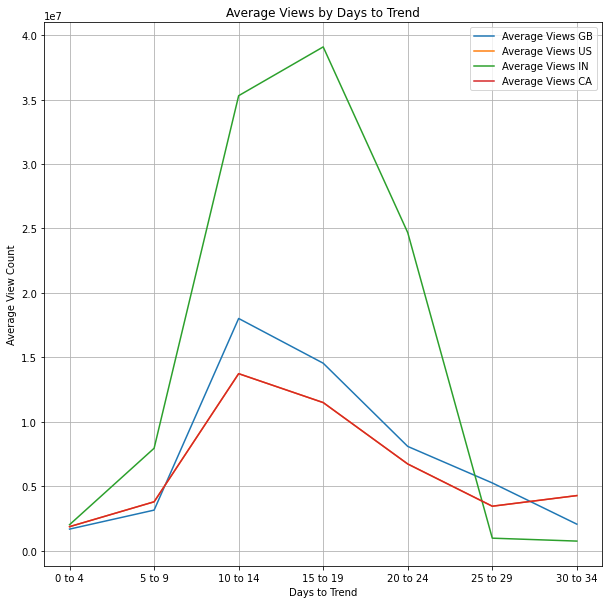

In [7]:
t_df.plot(kind='line', figsize=(10,10))
plt.title("Average Views by Days to Trend")
plt.ylabel("Average View Count")
plt.xlabel("Days to Trend")
plt.grid()
plt.savefig('Average Views by Days to Trend')

In [8]:
trend_likesIN= IN_data.groupby('Trend Group').mean()['likes']
trend_likesUS= US_data.groupby('Trend Group').mean()['likes']
trend_likesGB= GB_data.groupby('Trend Group').mean()['likes']
trend_likesCA= CA_data.groupby('Trend Group').mean()['likes']



trend_df=pd.DataFrame({ 
    "Average Likes IN": trend_likesIN,
    "Average Likes US": trend_likesUS,
    "Average Likes GB": trend_likesGB,
    "Average Likes CA": trend_likesCA,

})
trend_df = pd.DataFrame(trend_df, index=['0 to 4', '5 to 9', '10 to 14','15 to 19','20 to 24', '25 to 29', '30 to 34' ])


trend_df

,Average Likes IN,Average Likes US,Average Likes GB,Average Likes CA
0 to 4,1.096906e+05,121994.034127,106801.997811,121994.034127
5 to 9,3.555186e+05,194702.588100,161777.046706,194702.588100
10 to 14,1.077377e+06,418773.859724,489489.503240,418773.859724
15 to 19,1.280509e+06,358397.715426,377924.857868,358397.715426
20 to 24,7.516304e+05,231272.134454,260844.183673,231272.134454
25 to 29,6.949714e+03,181531.000000,101110.709677,181531.000000
30 to 34,1.044767e+04,171709.981818,100261.058824,171709.981818


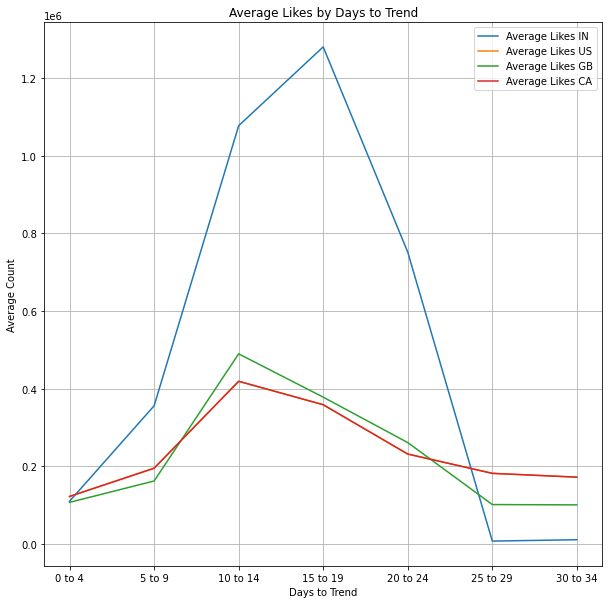

In [9]:
trend_df.plot(kind='line', figsize=(10,10))
plt.title("Average Likes by Days to Trend")
plt.ylabel("Average Count")
plt.xlabel("Days to Trend")
plt.grid()

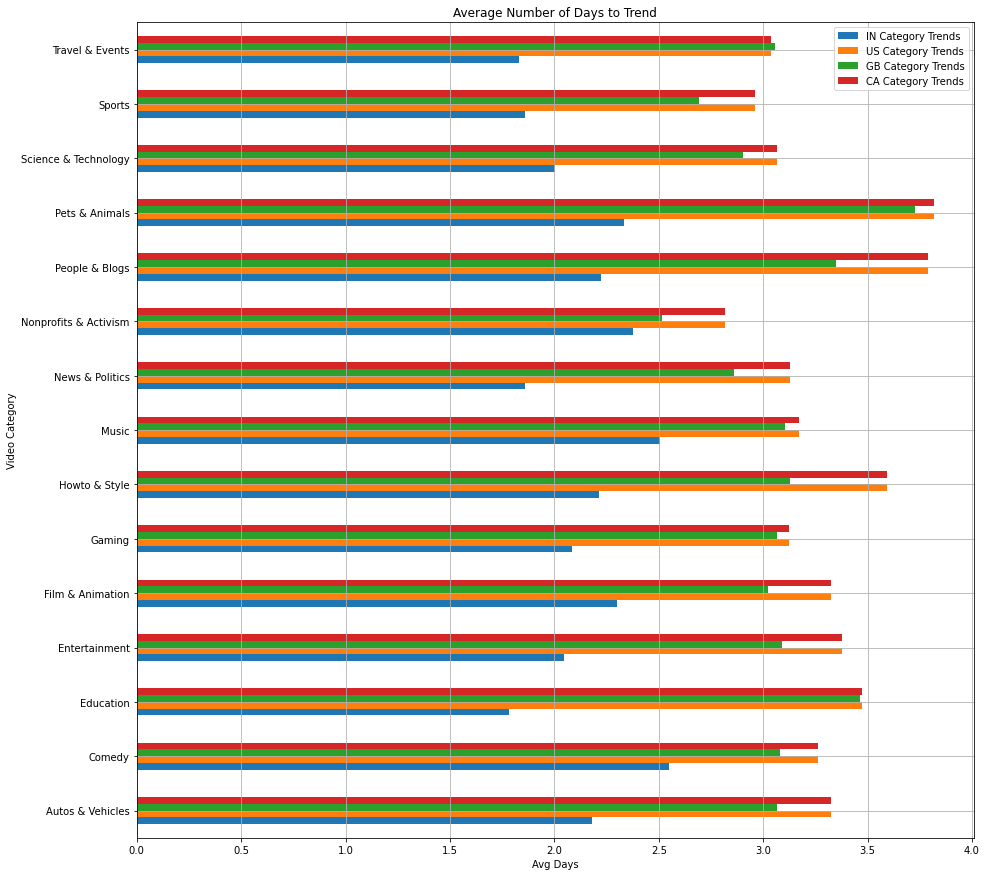

In [10]:
cat_timeIN = IN_data.groupby('categoryName').mean()['Days to Trend']
cat_timeUS = US_data.groupby('categoryName').mean()['Days to Trend']
cat_timeGB = GB_data.groupby('categoryName').mean()['Days to Trend']
cat_timeCA = CA_data.groupby('categoryName').mean()['Days to Trend']


df_cat= pd.DataFrame({
    'IN Category Trends':cat_timeIN,
    'US Category Trends':cat_timeUS,
    'GB Category Trends':cat_timeGB,
    'CA Category Trends':cat_timeCA,
})


df_cat.plot(kind='barh', figsize=(15,15))
plt.title("Average Number of Days to Trend")
plt.ylabel("Video Category")
plt.xlabel("Avg Days")
plt.grid()
plt.savefig('Average Number of Days to Trend')

## Bonus Plots

0 to 4      69749
5 to 9      10587
10 to 14       82
15 to 19       26
20 to 24       15
25 to 29        7
30 to 34        3
Name: Trend Group, dtype: int64


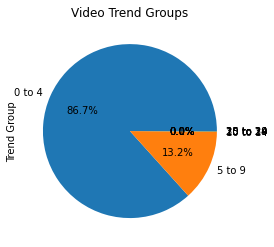

In [11]:
tg_values=IN_data['Trend Group'].value_counts()
tg_values.plot(kind='pie', autopct="%1.1f%%")
plt.title("Video Trend Groups")
print(tg_values)

Text(0.5, 0, 'Days to Trend')

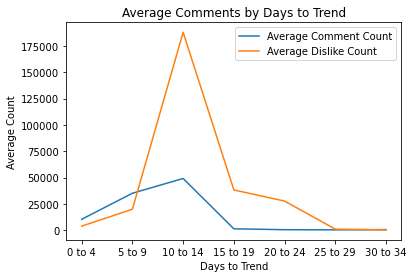

In [12]:
trend_cc=IN_data.groupby('Trend Group').mean()['comment_count']
trend_dis=IN_data.groupby('Trend Group').mean()['dislikes']
t2_df=pd.DataFrame({
    "Average Comment Count": trend_cc,
    "Average Dislike Count": trend_dis
})
t2_df = pd.DataFrame(t2_df, index=['0 to 4', '5 to 9', '10 to 14','15 to 19','20 to 24', '25 to 29', '30 to 34' ])

t2_df.plot(kind='line')
plt.title("Average Comments by Days to Trend")
plt.ylabel("Average Count")
plt.xlabel("Days to Trend")

Text(0.5, 0, 'Days to Trend')

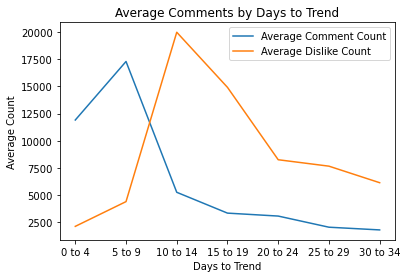

In [13]:
trend_cc=US_data.groupby('Trend Group').mean()['comment_count']
trend_dis=US_data.groupby('Trend Group').mean()['dislikes']
t2_df=pd.DataFrame({
    "Average Comment Count": trend_cc,
    "Average Dislike Count": trend_dis
})
t2_df = pd.DataFrame(t2_df, index=['0 to 4', '5 to 9', '10 to 14','15 to 19','20 to 24', '25 to 29', '30 to 34' ])

t2_df.plot(kind='line')
plt.title("Average Comments by Days to Trend")
plt.ylabel("Average Count")
plt.xlabel("Days to Trend")

Text(0.5, 0, 'Days to Trend')

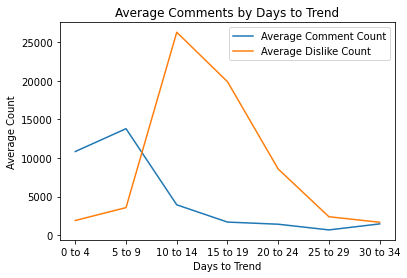

In [14]:
trend_cc=GB_data.groupby('Trend Group').mean()['comment_count']
trend_dis=GB_data.groupby('Trend Group').mean()['dislikes']
t2_df=pd.DataFrame({
    "Average Comment Count": trend_cc,
    "Average Dislike Count": trend_dis
})
t2_df = pd.DataFrame(t2_df, index=['0 to 4', '5 to 9', '10 to 14','15 to 19','20 to 24', '25 to 29', '30 to 34' ])

t2_df.plot(kind='line')
plt.title("Average Comments by Days to Trend")
plt.ylabel("Average Count")
plt.xlabel("Days to Trend")